In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
directory = "/mnt/immunogenomics/RUNS/run27-20180416-miseq/cordblood-mut-sites2/final/"
cloneFile1 = directory + "SP-CB21-Bu_S176_L001.assembled-AGCTAGCT-IGH_HUMAN-all_info.csv.rr.clones_subs.csv"
cloneFile2 = directory + "SP-CB21-Bu_S176_L001.assembled-AGCTAGCT-IGH_HUMAN-clones-mut-sites-reassigned.csv"

In [3]:
clones1 = pd.read_csv(cloneFile1, sep='\t', na_values=['None', ''])
clones1.head()

,cdr3pep,freq,uniq_umis,V_sub,J_sub,sum_sites,avg_sites,read_perc,umi_perc
0,CAHRGSSSSGLDYWGQGTLVT,310,275,IGHV2-5,IGHJ4,3,0.009677,0.861446,0.829488
1,CARDQQLVWGLFDYWGQGTLVT,285,260,IGHV3-7,IGHJ4,6,0.021053,0.791975,0.784243
2,CARASGRQQLGNWFDPWGQGTQVT,217,200,IGHV4-61,IGHJ5,196,0.903226,0.603012,0.603264
3,CASSAAAGTYWGQGTLVT,217,187,IGHV3-21,IGHJ4,1,0.004608,0.603012,0.564052
4,CARVGPGPYYFDYWGQGTLVT,216,201,IGHV4-59+IGHV4-61,IGHJ4,14,0.064815,0.600233,0.606280


In [4]:
clones2 = pd.read_csv(cloneFile2, sep='\t', na_values=['None', ''])
clones2.head()

,cdr3pep,V_sub,J_sub,acc.nunique,beforeMID.nunique,mut.count_x.sum,mut.count_x.mean,mut.frac_x.sum,mut.frac_x.mean,mut.count_y.sum,mut.count_y.mean,mut.frac_y.sum,mut.frac_y.mean,nr_sites.sum,nr_sites.mean,UMIs
0,CAHRGSSSSGLDYWGQGTLVT,IGHV2-5,IGHJ4,310,277,437.0,4.906358,1.801628,0.020441,0.0,0.000000,0.000000,0.000000,3.0,0.003378,275
1,CARDQQLVWGLFDYWGQGTLVT,IGHV3-7,IGHJ4,285,270,707.0,4.280915,2.955411,0.017933,0.0,0.000000,0.000000,0.000000,6.0,0.028703,260
2,CASSAAAGTYWGQGTLVT,IGHV3-21+IGHV3-48,IGHJ4,217,205,489.0,5.004922,2.091700,0.021393,0.0,0.000000,0.000000,0.000000,1.0,0.000419,187
3,CARASGRQQLGNWFDPWGQGTQVT,IGHV4-61,IGHJ5,217,210,1964.0,6.509551,8.018234,0.029236,219.0,1.001096,4.479875,0.020436,196.0,0.519456,200
4,CTSTLWEARDYWGQGTLVT,IGHV3-15,IGHJ4,216,206,457.0,6.751656,1.922904,0.029020,1.0,0.000543,0.025000,0.000014,4.0,0.051630,202


In [5]:
clones1_cdr3 = clones1.groupby('cdr3pep').agg({'freq': sum, 'uniq_umis': sum})
clones1_cdr3.head()

,freq,uniq_umis
cdr3pep,,
CAAASKAARRPFDYWGQGTLVT,1,1
CAAASYSGGYPFDYWGQGTLVT,1,1
CAAASYSGSYPFDYWGQGTLVT,2,2
CAADAFDIWGQGTLVT,1,1
CAADAFDIWGQGTMVT,74,62


In [6]:
clones2_cdr3 = clones2.groupby('cdr3pep').agg({'acc.nunique': sum, 'beforeMID.nunique': sum})
clones2_cdr3.head()

,acc.nunique,beforeMID.nunique
cdr3pep,,
CAAASKAARRPFDYWGQGTLVT,1,1
CAAASYSGGYPFDYWGQGTLVT,1,1
CAAASYSGSYPFDYWGQGTLVT,2,2
CAADAFDIWGQGTLVT,1,1
CAADAFDIWGQGTMVT,74,68


In [7]:
df = pd.merge(clones1_cdr3, clones2_cdr3, how='outer', left_index=True, right_index=True)
df.head()

,freq,uniq_umis,acc.nunique,beforeMID.nunique
cdr3pep,,,,
CAAASKAARRPFDYWGQGTLVT,1,1,1,1
CAAASYSGGYPFDYWGQGTLVT,1,1,1,1
CAAASYSGSYPFDYWGQGTLVT,2,2,2,2
CAADAFDIWGQGTLVT,1,1,1,1
CAADAFDIWGQGTMVT,74,62,74,68


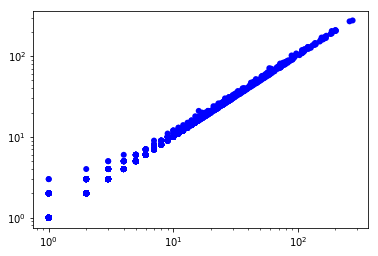

In [9]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(df['freq'], df['acc.nunique'], c='blue', edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')